In [0]:
!pip install kafka-python
!pip install networkx

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 6.8 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


# Creación del servicio productor Arbitrage

In [0]:
from kafka import KafkaProducer
import networkx as nx
import numpy as np
import requests
import time
import datetime
symbols = ['ETH','BTC','USD','EUR','SOL']
# Tasa de conversion 
s_symbols = str(symbols)[1:-1].replace("'","").replace(" ","")
print(s_symbols)
api_key = 'd65d7dda1cfde9f7a7f6f517d624d8a0c575f186647af620f9170e5bd5ef7092'
api_url = f"https://min-api.cryptocompare.com/data/pricemulti?fsyms={s_symbols}&tsyms={s_symbols}&api_key={api_key}"

ETH,BTC,USD,EUR,SOL


In [0]:
# Precios de las diferentes monedas
response = requests.get(api_url)
json = response.json()
json

Out[4]: {'ETH': {'ETH': 1,
  'BTC': 0.06684,
  'USD': 2037.94,
  'EUR': 1923.84,
  'SOL': 37.89},
 'BTC': {'ETH': 14.96,
  'BTC': 1,
  'USD': 30497.02,
  'EUR': 28792.18,
  'SOL': 567.86},
 'USD': {'ETH': 0.0004907,
  'BTC': 3.279e-05,
  'USD': 1,
  'EUR': 0.9443,
  'SOL': 0.01862},
 'EUR': {'ETH': 0.0005198,
  'BTC': 3.473e-05,
  'USD': 1.059,
  'EUR': 1,
  'SOL': 0.01972},
 'SOL': {'ETH': 0.02639,
  'BTC': 0.001761,
  'USD': 53.71,
  'EUR': 50.71,
  'SOL': 1}}

No arbitrage oportunities


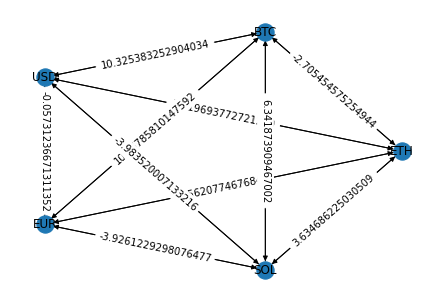

In [0]:
import networkx as nx
import numpy as np
# Ejemplo sobre como funciona el consumidor

def get_arbitrage(json_):
    # Build digraph
    D = nx.DiGraph()
    done = set()
    for k,v in json_.items():
        for s in v:
            if s!=k and (s,k) not in done and (k,s) not in done:
                q = -np.log(json_[k][s]) + 0.000001
                D.add_edge(k,s,weight = q)
                D.add_edge(s,k,weight = -q)
                done.add((s,k))
                done.add((k,s))
    pos = nx.circular_layout(D)
    nx.draw(D,pos,with_labels= True) 
    labels = nx.get_edge_attributes(D,'weight')
    nx.draw_networkx_edge_labels(D,pos,edge_labels=labels)

    nc = nx.algorithms.find_negative_cycle(D,'BTC')
    s = 0
    for i,u in enumerate(nc[:-1]):
        s += D[u][nc[i+1]]['weight']
    if s==0:
        print("No arbitrage oportunities")
    else:
        print(f"Over the cycle {nc} got {np.exp(-s)}")
get_arbitrage(json)

In [0]:
import time

producer = KafkaProducer(bootstrap_servers='localhost:9092')

while True:
    response = requests.get(api_url)
    json_ = response.json()
    print(str(json_).encode('utf-8'))
    producer.send("criptos2", str(json_).encode('utf-8'))   
    time.sleep(1)

b"{'ETH': {'ETH': 1, 'BTC': 0.06677, 'USD': 2027.82, 'EUR': 1915.56, 'SOL': 38.05}, 'BTC': {'ETH': 14.98, 'BTC': 1, 'USD': 30370.86, 'EUR': 28697.21, 'SOL': 569.8}, 'USD': {'ETH': 0.0004931, 'BTC': 3.293e-05, 'USD': 1, 'EUR': 0.9443, 'SOL': 0.01877}, 'EUR': {'ETH': 0.000522, 'BTC': 3.485e-05, 'USD': 1.059, 'EUR': 1, 'SOL': 0.01987}, 'SOL': {'ETH': 0.02628, 'BTC': 0.001755, 'USD': 53.29, 'EUR': 50.33, 'SOL': 1}}"
b"{'ETH': {'ETH': 1, 'BTC': 0.06677, 'USD': 2027.82, 'EUR': 1915.58, 'SOL': 38.05}, 'BTC': {'ETH': 14.98, 'BTC': 1, 'USD': 30370.86, 'EUR': 28698.8, 'SOL': 569.8}, 'USD': {'ETH': 0.0004931, 'BTC': 3.293e-05, 'USD': 1, 'EUR': 0.9443, 'SOL': 0.01875}, 'EUR': {'ETH': 0.000522, 'BTC': 3.484e-05, 'USD': 1.059, 'EUR': 1, 'SOL': 0.01987}, 'SOL': {'ETH': 0.02628, 'BTC': 0.001755, 'USD': 53.34, 'EUR': 50.33, 'SOL': 1}}"
b"{'ETH': {'ETH': 1, 'BTC': 0.06677, 'USD': 2027.65, 'EUR': 1915.54, 'SOL': 38.04}, 'BTC': {'ETH': 14.98, 'BTC': 1, 'USD': 30369.39, 'EUR': 28698.78, 'SOL': 569.8}, 'USD

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e588c84d-c012-4c07-8593-b08d1bf1b087' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>